# Import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Read Data + EDA

In [2]:
data = pd.read_csv('../data/seeds.csv')
print(data.shape)
data.head(3)

(199, 8)


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1


We have 199 samples with 7 features. All features are continuous. Data has no missing values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


Data has 3 target classes. Classes are almost balanced.

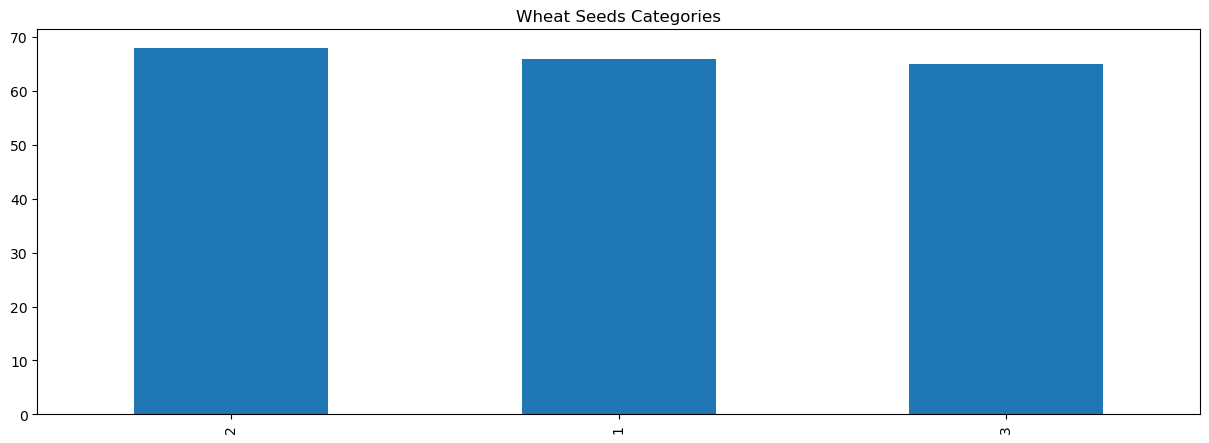

In [4]:
data['Type'].value_counts().plot(kind='bar', title='Wheat Seeds Categories', figsize=(15,5))
plt.show()

Check data for duplicates.

In [5]:
print(f'Number of duplicates: {data.duplicated().sum()}')

Number of duplicates: 0


See correlation between features.

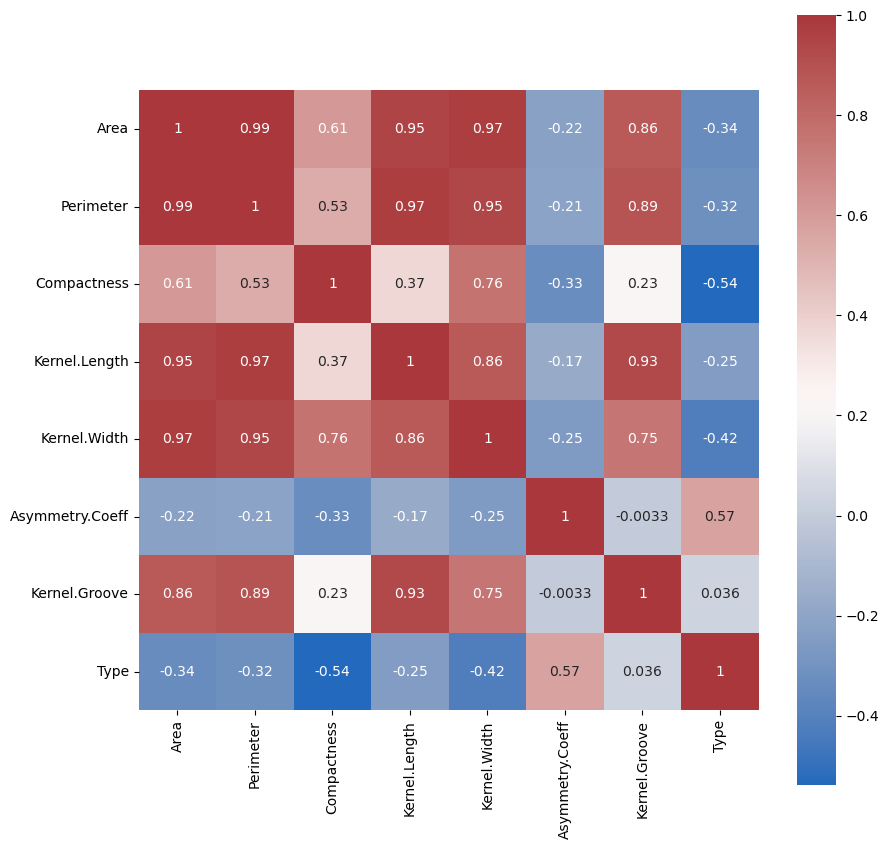

In [6]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True, square=True, ax=ax, cmap='vlag')
plt.yticks(rotation=360)
plt.show()

As we can see Asymmetry coefficient are highly negatively correlated with target variable. Also we can see that there is a strong correlation between compactness and target variable. At the same time correlation between compactness and Asymmetry coefficient is relatively low. So, probably, this variables will be the most useful for our future model.

But first, let's check how our features are distributed.

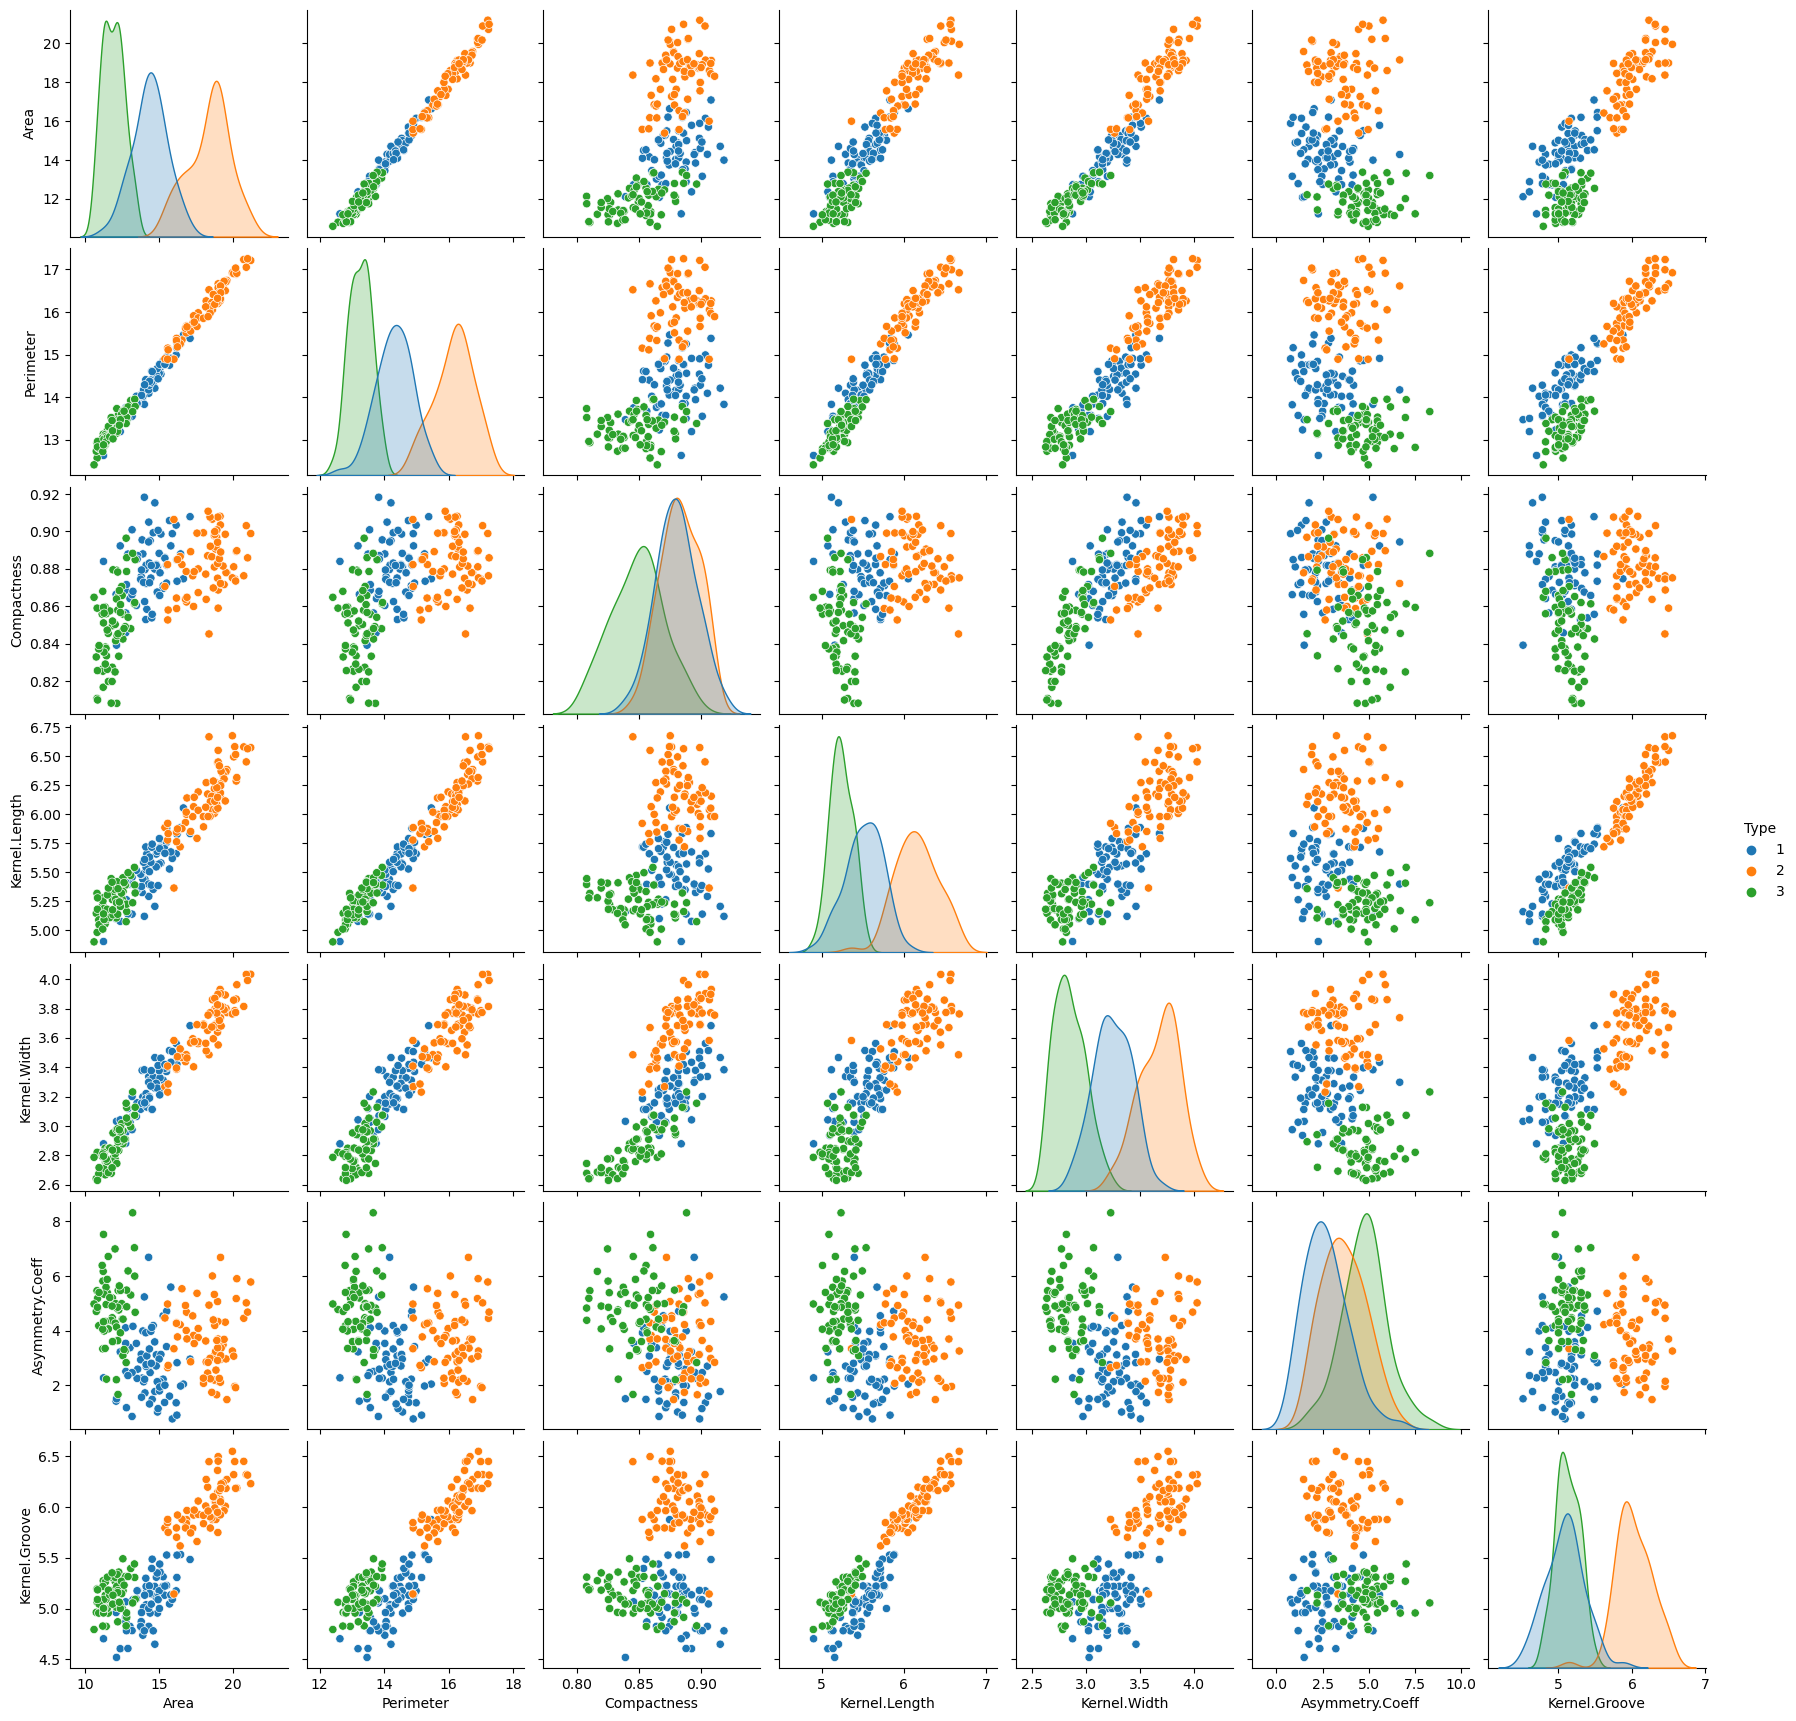

In [7]:
vis_data = data.copy()
vis_data['Type'] = vis_data['Type'].apply(str)
sns.pairplot(vis_data, hue='Type')

Finally, let's check our data for outliers.

<Axes: >

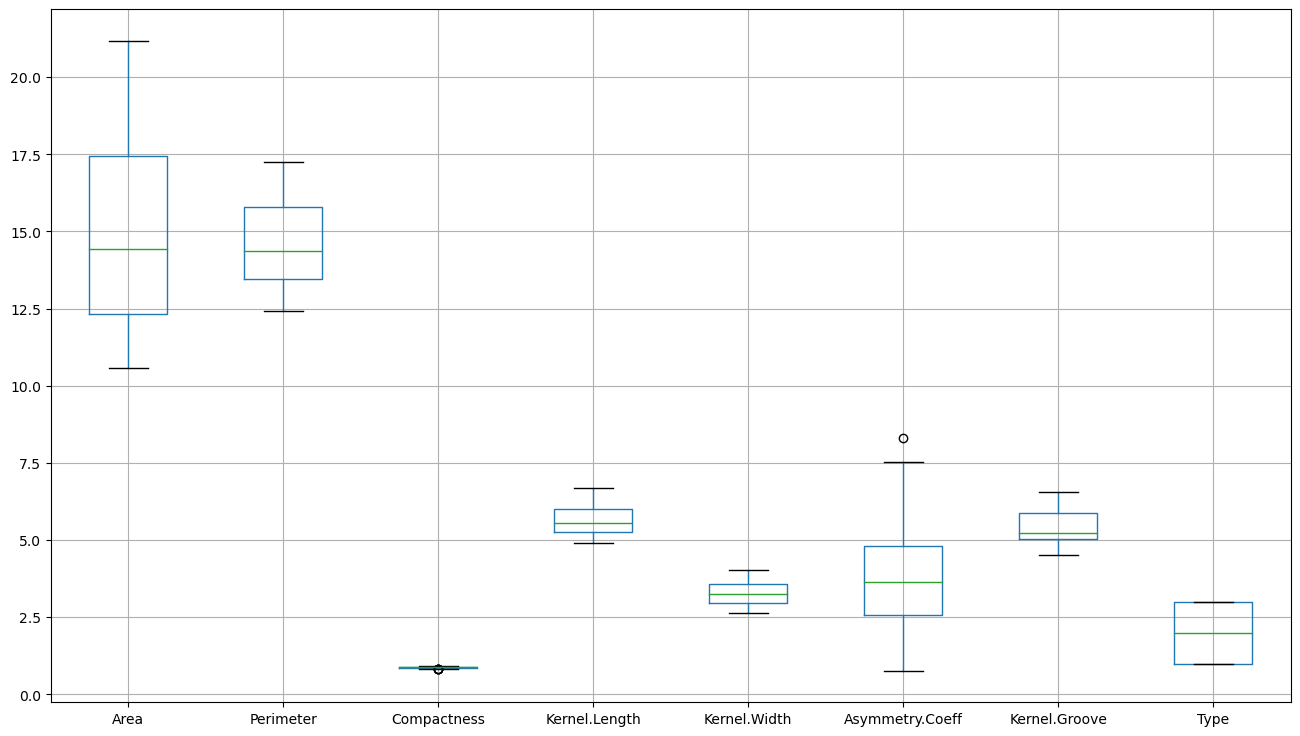

In [8]:
data.boxplot(figsize=(16,9))

# Data Preprocessing and Model Fitting

In [9]:
y = data['Type']
X = data.drop('Type', axis=1)

Perform train-test split.

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

Fit model.

In [11]:
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5)

Make predictions.

In [12]:
y_pred = clf.predict(X_test)

Show classification report.

In [13]:
for key, value in classification_report(y_test, y_pred, output_dict=True).items():
    print(f'{key}: {value}')

1: {'precision': 0.75, 'recall': 0.6923076923076923, 'f1-score': 0.7199999999999999, 'support': 13}
2: {'precision': 1.0, 'recall': 0.9523809523809523, 'f1-score': 0.975609756097561, 'support': 21}
3: {'precision': 0.7777777777777778, 'recall': 0.875, 'f1-score': 0.823529411764706, 'support': 16}
accuracy: 0.86
macro avg: {'precision': 0.8425925925925926, 'recall': 0.8398962148962149, 'f1-score': 0.839713055954089, 'support': 50}
weighted avg: {'precision': 0.8638888888888888, 'recall': 0.86, 'f1-score': 0.8604855093256815, 'support': 50}
